# Lab 7: Dimensionality Reduction

In this assignment, we will learn two unsupervised learning methods: Spectral Clustering and Principal Components Analysis

## Example 1: Spectral Clustering

In this example, we synthesize a toy dataset, which has two clusters. Then, we use K-means, Agglomerative, and Spectral clustering method to partition this dataset, respectively. 

For spectral clustering method, we use two methods to construct the similarity graph. The first one is to use the K-nearest neighbor graph method, where we set $K=1$ in this example. The second method is to use the fully connected graph method, where we use the  Gaussian (aka RBF) kernel method measure the simialrity between two samples. 

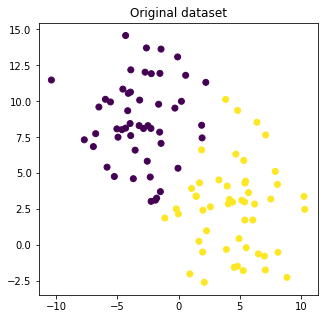

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn import datasets


# generate a toy dataset with two clusters
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0, random_state=42)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')
plt.show()

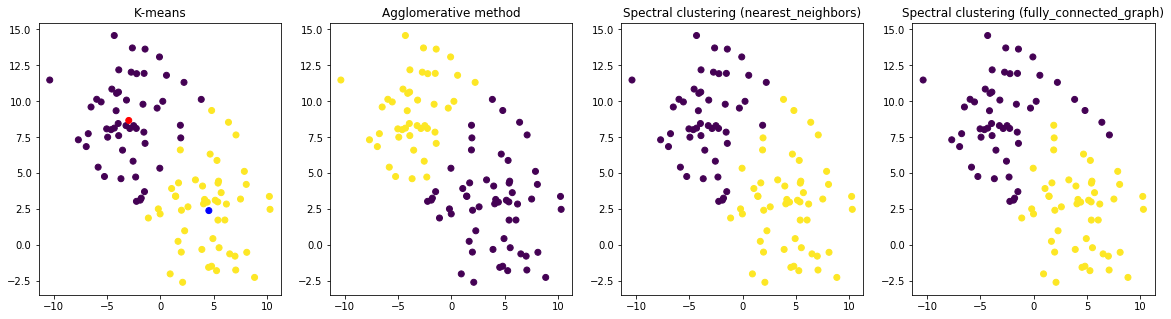

In [2]:
# partition the dataset with K-means
cluster_kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
centroids = cluster_kmeans.cluster_centers_  #get the clustering centroids

# partition the dataset with Agglomerative method
cluster_agg = AgglomerativeClustering(n_clusters=2).fit(X)

# partition the dataset with spectral clustering, here we use the 'nearest_neighbors' method to construct the similarity graph
cluster_sp_nn = SpectralClustering(n_clusters=2, assign_labels="discretize", affinity='nearest_neighbors', random_state=0).fit(X)

# partition the dataset with spectral clustering, here we use the 'fully connected graph' method to construct the similarity graph
cluster_sp_rbf = SpectralClustering(n_clusters=2, assign_labels="discretize", affinity='rbf', random_state=0).fit(X)


plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_kmeans.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['r', 'b'])  #visualize the clustering centroids
plt.title('K-means')

plt.subplot(1,4,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster_agg.labels_)
plt.title('Agglomerative method')

plt.subplot(1,4,3)
plt.scatter(X[:, 0], X[:, 1], c=cluster_sp_nn.labels_)
plt.title('Spectral clustering (nearest_neighbors)')

plt.subplot(1,4,4)
plt.scatter(X[:, 0], X[:, 1], c=cluster_sp_rbf.labels_)
plt.title('Spectral clustering (fully_connected_graph)')

plt.show()

Here, we evaluate the performance of these clustering methods with [normalized mutual information (NMI)](https://course.ccs.neu.edu/cs6140sp15/7_locality_cluster/Assignment-6/NMI.pdf)
The larger value indicates the better performance. 

In [3]:
from sklearn.metrics.cluster import normalized_mutual_info_score


nmi_kmeans = normalized_mutual_info_score(cluster_kmeans.labels_, y, average_method='arithmetic')
nmi_agg = normalized_mutual_info_score(cluster_agg.labels_, y, average_method='arithmetic')
nmi_sp_nn = normalized_mutual_info_score(cluster_sp_nn.labels_, y, average_method='arithmetic')
nmi_sp_rbf = normalized_mutual_info_score(cluster_sp_rbf.labels_, y, average_method='arithmetic')


print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi_kmeans))
print('The normalized mutual information score of the Agglomerative method is {:.4f}'.format(nmi_agg))
print('The normalized mutual information score of the Spectral Clustering (nearest_neighbors) method is {:.4f}'.format(nmi_sp_nn))
print('The normalized mutual information score of the Spectral Clustering (fully_connected_graph) method is {:.4f}'.format(nmi_sp_rbf))

The normalized mutual information score of the K-means method is 0.9291
The normalized mutual information score of the Agglomerative method is 0.6987
The normalized mutual information score of the Spectral Clustering (nearest_neighbors) method is 0.8782
The normalized mutual information score of the Spectral Clustering (fully_connected_graph) method is 0.6350


## Task 1: Spectral clustering for heart disease dataset

In this task, we use the [heart disease](heart.csv) dataset in Lab Assignment 5. 
Each sample has the following feature: 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect




**The task is to partition all users into two groups with Spectral Clustering method.**

Then, please compare its performance with the performance of K-means and Agglomerative methods that you obtained in Lab Assignment 6.

### 1.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features


In [4]:
# your code

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')

X2 = df.drop(df.columns[-1], axis=1).values
y2 = df[df.columns[-1]].values

print(df.isnull().sum())

df

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 1.2 Partition the dataset with Spectral Clustering and compute its NMI
Please use K-nearest neighbor graph method and fully connected graph method to build the similarity graph, respectively. Compare their clustering performance by visualization and computing NMI. 

C:\Users\ryanr\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


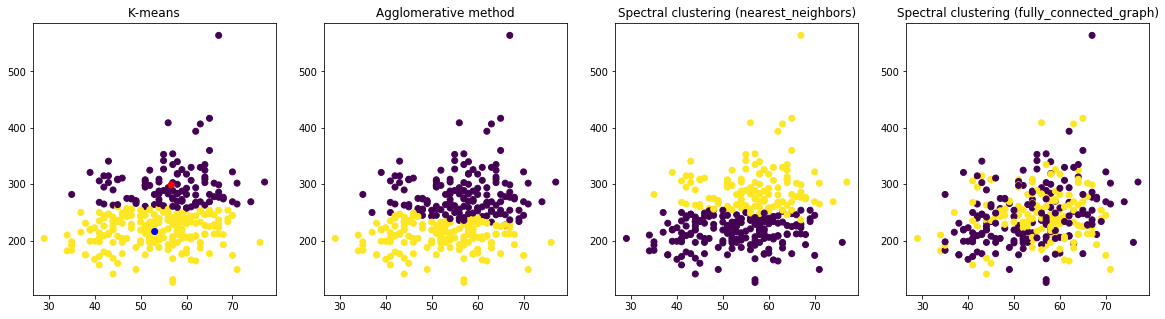

The normalized mutual information score of the K-means method is 0.0138
The normalized mutual information score of the Agglomerative method is 0.0111
The normalized mutual information score of the Spectral Clustering (nearest_neighbors) method is 0.0209
The normalized mutual information score of the Spectral Clustering (fully_connected_graph) method is 0.0000


In [5]:
# your code

# partition the dataset with K-means
cluster_kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X2)
centroids2 = cluster_kmeans2.cluster_centers_  #get the clustering centroids

# partition the dataset with Agglomerative method
cluster_agg2 = AgglomerativeClustering(n_clusters=2).fit(X2)

# partition the dataset with spectral clustering, here we use the 'nearest_neighbors' method to construct the similarity graph
cluster_sp_nn2 = SpectralClustering(n_clusters=2, assign_labels="discretize", affinity='nearest_neighbors', random_state=0).fit(X2)

# partition the dataset with spectral clustering, here we use the 'fully connected graph' method to construct the similarity graph
cluster_sp_rbf2 = SpectralClustering(n_clusters=2, assign_labels="discretize", affinity='rbf', random_state=0).fit(X2)


plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.scatter(X2[:, 0], X2[:, 4], c=cluster_kmeans2.labels_)
plt.scatter(centroids2[:, 0], centroids2[:, 4], c=['r', 'b'])  #visualize the clustering centroids
plt.title('K-means')

plt.subplot(1,4,2)
plt.scatter(X2[:, 0], X2[:, 4], c=cluster_agg2.labels_)
plt.title('Agglomerative method')

plt.subplot(1,4,3)
plt.scatter(X2[:, 0], X2[:, 4], c=cluster_sp_nn2.labels_)
plt.title('Spectral clustering (nearest_neighbors)')

plt.subplot(1,4,4)
plt.scatter(X2[:, 0], X2[:, 4], c=cluster_sp_rbf2.labels_)
plt.title('Spectral clustering (fully_connected_graph)')

plt.show()

from sklearn.metrics.cluster import normalized_mutual_info_score

nmi_kmeans = normalized_mutual_info_score(cluster_kmeans2.labels_, y2, average_method='arithmetic')
nmi_agg = normalized_mutual_info_score(cluster_agg2.labels_, y2, average_method='arithmetic')
nmi_sp_nn = normalized_mutual_info_score(cluster_sp_nn2.labels_, y2, average_method='arithmetic')
nmi_sp_rbf = normalized_mutual_info_score(cluster_sp_rbf2.labels_, y2, average_method='arithmetic')

print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi_kmeans))
print('The normalized mutual information score of the Agglomerative method is {:.4f}'.format(nmi_agg))
print('The normalized mutual information score of the Spectral Clustering (nearest_neighbors) method is {:.4f}'.format(nmi_sp_nn))
print('The normalized mutual information score of the Spectral Clustering (fully_connected_graph) method is {:.4f}'.format(nmi_sp_rbf))

## Example 2: Principal Component Analysis

In this example, we will show how to use PCA to reduce the dimensionality of the dataset. 

Here, we use the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). It is a classification dataset. Each sample has 4 features. In this example, we will use PCA to reduce the number of features from 4 to 2, and then visualize this new dataset in 2D space. 

number of original features: 4
number of new features: 2


Text(0.5, 1.0, 'PCA of IRIS dataset')

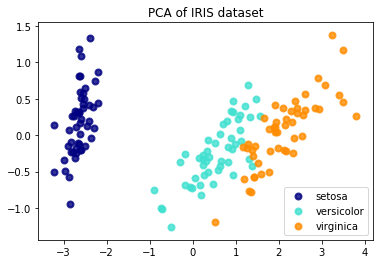

In [6]:
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

# load dataset, which has 3 classes
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

print('number of original features: {}'.format(X.shape[1]))

#centering the data
X -= np.mean(X, axis = 0)  

# pca, reduce the number of features from 4 to 2
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

print('number of new features: {}'.format(X_r.shape[1]))


# visualization
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

In the following, we will apply Kmeans method to this dataset. In particular, we will apply Kmeans to the original data and the dimensionality-reduced data. 

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score


# partition the original dataset with K-means
cluster_original = KMeans(n_clusters=2, random_state=0).fit(X)
centroids = cluster_kmeans.cluster_centers_  #get the clustering centroids

# partition the dimensionality-reduced dataset with K-means
cluster_pca = KMeans(n_clusters=2, random_state=0).fit(X_r)
centroids = cluster_kmeans.cluster_centers_  #get the clustering centroids

#evaluate the clustering performance
nmi_original = normalized_mutual_info_score(cluster_original.labels_, y, average_method='arithmetic')
nmi_pca = normalized_mutual_info_score(cluster_pca.labels_, y, average_method='arithmetic')

print('The normalized mutual information score of the original dataset is {:.4f}'.format(nmi_original))
print('The normalized mutual information score of the dimensionality-reduced dataset is {:.4f}'.format(nmi_pca))


The normalized mutual information score of the original dataset is 0.6565
The normalized mutual information score of the dimensionality-reduced dataset is 0.6565


From the clustering performance, we can see that they have almost the same clustering performance, which means that PCA keeps almost all the information in the original data. 

## Task 2: PCA for  heart disease dataset

In this experiment, we still use the [heart disease](heart.csv) dataset in Lab Assignment 5. 
Each sample has the following feature: 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

This dataset has a lot of features. In this experiment, we will use PCA method to reduce the dimensionality of the original data, and then we apply the Logistic regression model to the dimensionality-reduced data to do classification. 

### 2.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features
* $\color{red}{Centering\ the\ data}$


In [8]:
# your code
# your code
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')

X2 = df.drop(df.columns[-1], axis=1).values
y2 = df[df.columns[-1]].values

print(df.isnull().sum())

#center the data
X2 -= np.mean(X2, axis = 0) 

df

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 2.2 Use PCA to do dimensionality reduction for visualization

* Please reduce the number of features to 2 and visualize this dataset by following the given example.


number of original features: 13
number of new features: 2


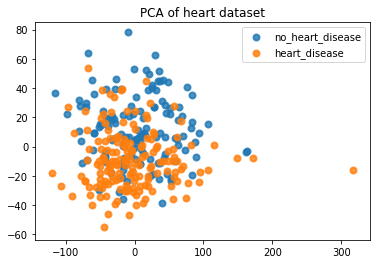

In [9]:
# your code
pca = PCA(n_components=2)
X2_r = pca.fit(X2).transform(X2)

print('number of original features: {}'.format(X2.shape[1]))
print('number of new features: {}'.format(X2_r.shape[1]))

plt.figure()
lw = 2

for i, target_name in zip(np.arange(0, len(X2_r)), ['no_heart_disease', 'heart_disease']):
    plt.scatter(X2_r[y2 == i, 0], X2_r[y2 == i, 1], alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of heart dataset')
plt.show()

### 2.3 Use PCA to do dimensionality reduction and then conduct classification

* Please reduce the number of features to different values (e.g. 2, 5, 10)
* Then, please run logistic regression model with the dimensionality-reduced data.
* Compare the classification performance (e.g. accuracy, F1-score) when using different number of features(e.g. 2, 5, 10). 


In [15]:
# your code
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
X2_train_val, X2_test, y2_train_val, y2_test = train_test_split(X2, y2, 
                                                            test_size=0.14, 
                                                            random_state=0)
print("train: {}, test: {}".format(X2_train_val.shape[0], X2_test.shape[0]))

normalizer = StandardScaler()
X2_train_val = normalizer.fit_transform(X2_train_val)
X2_test = normalizer.transform(X2_test)

for num_features in [2, 4, 5, 10, 13]:
    pca = PCA(n_components = num_features)
    X2_train_val_r = pca.fit(X2_train_val).transform(X2_train_val)
    X2_test_r = pca.fit(X2_test).transform(X2_test)
    
    print('\nnumber of new features: {}'.format(X2_train_val_r.shape[1]))
    
    
    
    # here we use 10-fold cross-validation
    folds = 10

    # get the number of samples in the training and validation set
    num_train_val = X2_train_val_r.shape[0] 

    # shuffle the index of samples in the train_val set
    index_of_samples = np.arange(num_train_val) 
    shuffle(index_of_samples)

    # split the index of the train_valid set into 5 folds
    index_of_folds = index_of_samples.reshape(folds, -1)

    # potential hyperparameters. 
    #These hyperparameters are just used for illustration. 
    #You should try more hyperparameters to get a good model.
    #The hyperparameters must be nonnegative!
    regularization_coefficient = [100000, 10000, 1000, 100, 10, 1.0, 0.1, 0.05, 0.02, 0.01]

    best_acc = 0.0
    best_reg = 0.0

    for reg in regularization_coefficient:

        #10-fold cross-validation
        sum_acc = 0.0
        for fold in range(folds):

            index_of_folds_temp = index_of_folds.copy()

            valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
            train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set
            #print(train_index)

            # training set
            X2_train_r = X2_train_val_r[train_index]
            y2_train = y2_train_val[train_index]

            # validation set
            X2_valid_r = X2_train_val_r[valid_index]
            y2_valid = y2_train_val[valid_index]

            # build the model with different hyperparameters
            clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')

            #train the model with the training set
            clf.fit(X2_train_r, y2_train)

            y2_valid_pred = clf.predict(X2_valid_r)
            acc = accuracy_score(y2_valid, y2_valid_pred)

            sum_acc += acc

        cur_acc = sum_acc / folds

        print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))

        # store the best hyperparameter
        if cur_acc > best_acc:
            best_acc = cur_acc
            best_reg = reg
    
    clf = LogisticRegression(penalty='l2', C=best_reg, solver='lbfgs')
    clf.fit(X2_train_val_r, y2_train_val)
    y2_test_pred = clf.predict(X2_test_r)
    
    acc = accuracy_score(y2_test, y2_test_pred)
    f1 = f1_score(y2_test, y2_test_pred)
    recall = recall_score(y2_test, y2_test_pred)
    precision = precision_score(y2_test, y2_test_pred)
    
    print("best_reg_coeff: {}, accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f}".format(1.0/best_reg, acc, recall, precision, f1))

train: 260, test: 43

number of new features: 2
reg_coeff: 1e-05, acc: 0.812
reg_coeff: 0.0001, acc: 0.812
reg_coeff: 0.001, acc: 0.812
reg_coeff: 0.01, acc: 0.812
reg_coeff: 0.1, acc: 0.812
reg_coeff: 1.0, acc: 0.812
reg_coeff: 10.0, acc: 0.823
reg_coeff: 20.0, acc: 0.823
reg_coeff: 50.0, acc: 0.815
reg_coeff: 100.0, acc: 0.812
best_reg_coeff: 10.0, accuracy: 0.860, recall: 0.952, precision: 0.800, f1: 0.870

number of new features: 4
reg_coeff: 1e-05, acc: 0.827
reg_coeff: 0.0001, acc: 0.827
reg_coeff: 0.001, acc: 0.827
reg_coeff: 0.01, acc: 0.827
reg_coeff: 0.1, acc: 0.827
reg_coeff: 1.0, acc: 0.827
reg_coeff: 10.0, acc: 0.831
reg_coeff: 20.0, acc: 0.831
reg_coeff: 50.0, acc: 0.827
reg_coeff: 100.0, acc: 0.827
best_reg_coeff: 10.0, accuracy: 0.791, recall: 0.857, precision: 0.750, f1: 0.800

number of new features: 5
reg_coeff: 1e-05, acc: 0.831
reg_coeff: 0.0001, acc: 0.831
reg_coeff: 0.001, acc: 0.831
reg_coeff: 0.01, acc: 0.831
reg_coeff: 0.1, acc: 0.831
reg_coeff: 1.0, acc: 0.82